In [65]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

In [4]:
df = pd.read_csv("online_shoppers_intention.csv")
preprocessed_df = pd.read_csv("preprocessedData.csv")

In [10]:
categorical_features = ['OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']
target = "Revenue"

preprocessed_df[categorical_features] = preprocessed_df[categorical_features].astype('category') 
preprocessed_df[target] = preprocessed_df[target].astype('category') 

In [11]:
preprocessed_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Unnamed: 0                     12330 non-null  int64   
 1   Administrative                 12330 non-null  float64 
 2   Administrative_Duration        12330 non-null  float64 
 3   Informational                  12330 non-null  float64 
 4   Informational_Duration         12330 non-null  float64 
 5   ProductRelated                 12330 non-null  float64 
 6   ProductRelated_Duration        12330 non-null  float64 
 7   BounceRates                    12330 non-null  float64 
 8   ExitRates                      12330 non-null  float64 
 9   PageValues                     12330 non-null  float64 
 10  SpecialDay                     12330 non-null  float64 
 11  Revenue                        12330 non-null  category
 12  OperatingSystems_1             1

In [24]:
# Split dataframe into x and y

X = preprocessed_df.drop(columns=["Revenue"])
y = preprocessed_df["Revenue"].values

In [25]:
# Split dataframe into train and test data
# Note: Stratify preserves the propotion of Revenue of T/F in the testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Building KNN Classifier

In [26]:
# Create KNN classifier

knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [62]:
# Show first 100 model predictions on the test data
knn.predict(X_test)[0:100]
y_preds_knn = knn.predict(X_test)

In [33]:
# Accuracy on the test data
knn.score(X_test, y_test)

0.8142741281427412

###  Confusion Matrix

In [34]:
conf_mat = confusion_matrix(y_test, y_preds_knn)
print(conf_mat)

[[2958  169]
 [ 518   54]]


### F1-Score 

In [45]:
print('Overall F1-Score                                    : %.6f'%f1_score(y_test, y_preds_knn))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_preds_knn))

Overall F1-Score                                    : 0.135849

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3127
           1       0.24      0.09      0.14       572

    accuracy                           0.81      3699
   macro avg       0.55      0.52      0.52      3699
weighted avg       0.76      0.81      0.78      3699



### Cross-validation KNN Classifier

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.8459043  0.11273317 0.00973236 0.02108678 0.00648824 0.00486618
 0.00892133 0.10786699 0.27331711 0.15490673]
cv_scores mean:0.1545823195458232


# ROC Curve 

In [72]:
# ROC area for each class

fpr, tpr, thresholds = roc_curve(y_test, y_preds_knn)
auc = roc_auc_score(y_test, y_preds_knn)
print('AUC KNN: %.6f' % auc)

AUC KNN: 0.520180


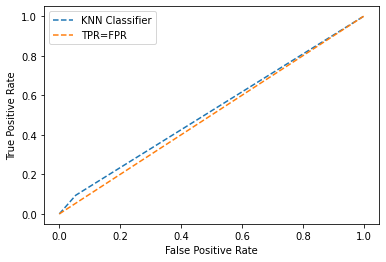

In [75]:
# Generating ROC Curve Plot

# For KNN Classifier
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_preds_knn)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='KNN Classifier')

# For the straight line:
straight_probs = [0 for _ in range(len(y_test))]
straight_fpr, straight_tpr, _ = roc_curve(y_test, straight_probs)

# To Plot
pyplot.plot(straight_fpr, straight_tpr, linestyle='--', label="TPR=FPR")
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.savefig("ROCCurve.png")
pyplot.show()